# Text Classification 

In [ ]:
import numpy as np
import pandas as pd 
import os

In [ ]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -O imdb.tar.gz
import tarfile
with tarfile.open('imdb.tar.gz', 'r:gz') as tar:
    tar.extractall()

--2023-02-25 15:03:52--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘imdb.tar.gz’

imdb.tar.gz         100%[===================>]  80.23M  15.6MB/s    in 8.8s    

2023-02-25 15:04:01 (9.07 MB/s) - ‘imdb.tar.gz’ saved [84125825/84125825]



In [ ]:
X=[]
y=[]

In [ ]:
# Reading text data into list
# there are two comments "pos" and "neg"

for category in ('neg','pos'):
  trainpath=os.path.join('/content/aclImdb','train',category)
  for filename in os.listdir(trainpath):
    if filename.endswith(".txt"):
      with open(os.path.join(trainpath,filename)) as f:
        X.append(f.read())
        y.append(1 if category=="pos" else 0)

In [ ]:
len(X)

25000

In [ ]:
len(y)

25000

In [ ]:
X[0]

"SPOILERS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br /><br />I watched half of this movie and I didn't like it. <br /><br />First reason: Boring. Barely anything happens, the women sit around and discuss how terrible their lives are and how they have no hope, they smoke weed, read magazines, care for their sick friend, and cut up the occasional dead body. BORING!!!!<br /><br />Second reason: There are too many things left unexplained. Many scenes are dedicated to a zombie hunter who kidnaps random men, restrains them in a chair and interrogates them. Who are these men? How do they know anything about illegal activity concerning the diseased flesh eaters? Why does he kill one and let another one go?<br /><br />Also there is this dude who at first I thought also had the flesh eating disease but he puts his fist through a wall with superhuman strength suggesting he's not quite what we originally thought-never explained! How frustrating is that? <br /><br />Conclusion: I found the women annoying, 

In [ ]:
Xtest=[]
ytest=[]

In [ ]:
# reading test data
for category in ('neg','pos'):
  testpath=os.path.join('/content/aclImdb','test',category)
  for filename in os.listdir(testpath):
    if filename.endswith(".txt"):
      with open(os.path.join(testpath,filename)) as f:
        Xtest.append(f.read())
        ytest.append(1 if category=="pos" else 0)

In [ ]:
Xtest[0]

"There were so many things wrong with this movie i have trouble keeping them all straight. But one thing that really bothers me is that if Jigsaw was the one laying on the ground in the bathroom, what happens if Zep never shows up? What if Zep was killed by Danny Gloover before he made it to the bathroom? Does Jigsaw simply just get up and walk out? Could the guy in the middle of the bathroom not be jigsaw, but another part of Jigsaw's game? What if Zep killed the wife and kid, how does Jigsaw get him the antidote for the poison if he's lying in the middle of the bathroom? Why does the doctor wait till the last minute to finally cut off his foot? It was too late, it was after six and as far as he knew his wife and child were already shot dead, it wasn't the best time for heroics. These are just a few questions i had about the film, but i may be missing something or everything as i have only seen the movie once. Please Help!"

In [ ]:
len(Xtest)

25000

# Tokenization and vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
vect = TfidfVectorizer(
    strip_accents='unicode',
    decode_error='replace',
    dtype='int32',
    analyzer='word',
    ngram_range=(1,2),
    min_df=2
)

In [ ]:
Xtrain=vect.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  warnings.warn(


In [ ]:
Xtest=vect.transform(Xtest)

In [ ]:
Xtrain.shape

(25000, 438613)

In [ ]:
Xtest.shape

(25000, 438613)

In [ ]:
#best 20000 features on basis on anova test
selector = SelectKBest(f_classif, k=min(5000, Xtrain.shape[1]))
selector.fit(Xtrain, y)

SelectKBest(k=5000)

In [ ]:
Xtrain = selector.transform(Xtrain).astype('float64')



In [ ]:
Xtest = selector.transform(Xtest).astype('float64')


In [ ]:
Xtrain.shape

(25000, 5000)

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain,Xval,ytrain,yval=train_test_split(Xtrain,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
type(Xtrain)

scipy.sparse.csr.csr_matrix

'\ndoesnt work \n\nXtrain = np.array(Xtrain)\nXval = np.array(Xval)\nXtest = np.array(Xtest)\nytrain = np.array(ytrain)\nyval = np.array(yval)\nytest = np.array(ytest)\n'

In [ ]:
X_train = Xtrain.toarray()
X_val = Xval.toarray()
X_test = Xtest.toarray()
ytrain = np.array(ytrain)
yval = np.array(yval)
ytest = np.array(ytest)

In [ ]:
Xtrain.shape

(20000, 5000)

In [ ]:
Xtest.shape

(25000, 5000)

In [ ]:
Xval.shape

(5000, 5000)

# ANN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

In [ ]:
# ANN Building
commentsANN=Sequential()

In [ ]:
commentsANN.add(Flatten())

In [ ]:
# addition of layers and units 

commentsANN.add(Dense(units=128,activation='relu'))
commentsANN.add(Dropout(rate=0.1))

In [ ]:
# output layer

commentsANN.add(Dense(units=1,activation='sigmoid'))     # binary classification -- sigmoid activation

In [ ]:
# exponential Decay rate and compilation

from tensorflow.keras.optimizers.schedules import ExponentialDecay
from keras.optimizers import Adam
'''
ExponentialDecay - with iterations reduce the learning rate
'''
initial_learning_rate = 0.001
lr=ExponentialDecay(initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

commentsANN.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=Adam(learning_rate=lr))
                  

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


'''
EarlyStopping( - when metric doesnt improve for certain epochs we stop training
  monitor="val_accuracy", - metric to monitor
  patience=10, - number of epochs we monitor metric
  verbose=1, - message will be printed
  )
'''
'''
ReduceLROnPlateau( - reduce learning rate if no improvement in metric
  monitor="val_accuracy", - metric to monitor
  factor=0.1, - old learning * factor = new learning rate
  patience=5, - number of epochs we monitor metric
  verbose=1, - message will be printed
  )
'''
es = EarlyStopping(monitor="val_accuracy", patience=10, verbose=1)
#rd = ReduceLROnPlateau(monitor="val_accuracy",factor=0.1,patience=5,verbose=1)

mc = ModelCheckpoint(filepath='bestmodel.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = commentsANN.fit(X_train, ytrain, epochs=5, validation_data=(X_val, yval), callbacks=[mc,es])

Epoch 1/5
612/625 [============================>.] - ETA: 0s - loss: 0.3385 - accuracy: 0.8786
Epoch 1: val_accuracy improved from -inf to 0.90380, saving model to bestmodel.h5
625/625 [==============================] - 6s 4ms/step - loss: 0.3359 - accuracy: 0.8794 - val_loss: 0.2326 - val_accuracy: 0.9038
Epoch 2/5
616/625 [============================>.] - ETA: 0s - loss: 0.1887 - accuracy: 0.9259
Epoch 2: val_accuracy improved from 0.90380 to 0.90900, saving model to bestmodel.h5
625/625 [==============================] - 2s 3ms/step - loss: 0.1884 - accuracy: 0.9261 - val_loss: 0.2194 - val_accuracy: 0.9090
Epoch 3/5
625/625 [==============================] - ETA: 0s - loss: 0.1561 - accuracy: 0.9387
Epoch 3: val_accuracy improved from 0.90900 to 0.90940, saving model to bestmodel.h5
625/625 [==============================] - 2s 4ms/step - loss: 0.1561 - accuracy: 0.9387 - val_loss: 0.2218 - val_accuracy: 0.9094
Epoch 4/5
614/625 [============================>.] - ETA: 0s - loss: 0

In [ ]:
#ANN architecture

commentsANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 5000)              0         
                                                                 
 dense (Dense)               (None, 128)               640128    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 640,257
Trainable params: 640,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt

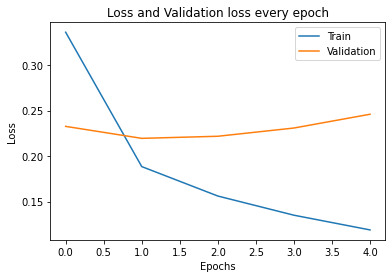

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.title('Loss and Validation loss every epoch')
plt.show()

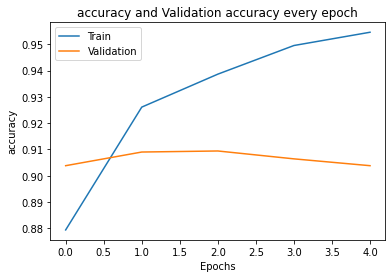

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation'])
plt.title('accuracy and Validation accuracy every epoch')
plt.show()

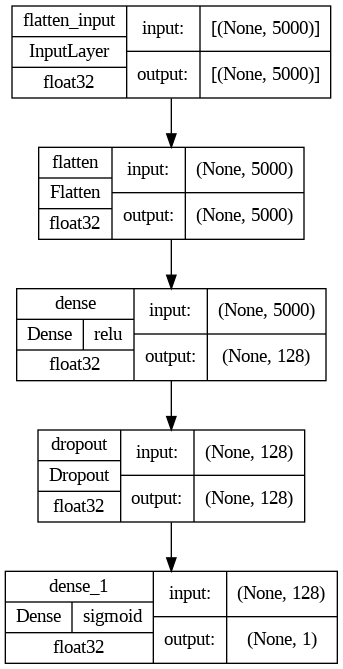

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(commentsANN, show_shapes=True, show_dtype=True, show_layer_activations=True, show_layer_names=True)

# Prediction

In [ ]:
ypred = commentsANN.predict(X_test)

782/782 [==============================] - 1s 2ms/step


In [ ]:
ypred

array([[0.848631  ],
       [0.00406403],
       [0.28653598],
       ...,
       [0.7583659 ],
       [0.3895721 ],
       [0.9998877 ]], dtype=float32)

In [ ]:
ypred_classes=np.argmax(ypred,axis=-1)

In [ ]:
ypred_classes

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from keras.models import load_model
bestmodel = load_model('/content/bestmodel.h5')

# evaluate on commentsANN

In [ ]:
commentsANN.evaluate(X_test, ytest)

782/782 [==============================] - 2s 3ms/step - loss: 0.2970 - accuracy: 0.8891


[0.29695066809654236, 0.8890799880027771]

# evaluate bestmodel

In [ ]:
bestmodel.evaluate(X_test, ytest)

782/782 [==============================] - 3s 3ms/step - loss: 0.2584 - accuracy: 0.8970


[0.2583540678024292, 0.8969600200653076]

# Deployment

In [ ]:
comment = ['the film made me feel young again']



In [ ]:
X_deployment = vect.transform(comment)

X_deployment_best = selector.transform(X_deployment)



In [ ]:
X_deployment_best_array = X_deployment_best.toarray()



In [ ]:
predict_comment=bestmodel.predict(X_deployment_best_array)

1/1 [==============================] - 0s 30ms/step


In [ ]:
predict_comment

array([[0.3805651]], dtype=float32)

In [ ]:
comment_pred=np.argmax(predict_comment)

In [ ]:
comment_pred

0